-----
# Analysis of the Training Data
-----

## Extract Data

In [130]:
from helper import read_in_data, add_textual_label

# Read in train data
# Task 1
data_json = 'data/task1_train.jsonl'
label_json = 'data/sdg_label_mapping.json'
train_data = read_in_data(data_json)
train_data_1 = add_textual_label(label_json, train_data)

# Task 2
data_json = 'data/task2_train.jsonl'
label_json = 'data/sdg_label_mapping.json'
train_data = read_in_data(data_json)
train_data_2 = add_textual_label(label_json, train_data)


---
## Task 1

### General

In [138]:
df = train_data_1
df.head()

,ID,TITLE,ABSTRACT,URL,SDG,Label
0,oai:www.zora.uzh.ch:126666,Identifying phrasemes via interlingual associa...,"In corpus linguistics, statistical association...",https://www.zora.uzh.ch/id/eprint/126666,0,non-relevant
1,oai:www.zora.uzh.ch:106593,Synthesis of tripeptide derivatized cyclopenta...,We describe the syntheses of half-sandwich com...,https://www.zora.uzh.ch/id/eprint/106593,0,non-relevant
2,oai:www.zora.uzh.ch:203310,Intelligence test items varying in capacity de...,There is a strong relationship between fluid i...,https://www.zora.uzh.ch/id/eprint/203310,0,non-relevant
3,oai:www.zora.uzh.ch:145601,Copy number increases of transposable elements...,Evolutionary dynamics of structural genetic va...,https://www.zora.uzh.ch/id/eprint/145601,14,Life Below Water
4,oai:www.zora.uzh.ch:188559,Linguistics : An Interdisciplinary Journal of ...,At the heart of this special issue are partiti...,https://www.zora.uzh.ch/id/eprint/188559,0,non-relevant


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        432 non-null    object
 1   TITLE     432 non-null    object
 2   ABSTRACT  432 non-null    object
 3   URL       432 non-null    object
 4   SDG       432 non-null    int64 
 5   Label     432 non-null    object
dtypes: int64(1), object(5)
memory usage: 20.4+ KB


### Classes

In [27]:
print(f"Total unique labels: {df.Label.nunique()}")

Total unique labels: 18


In [120]:
df.Label.value_counts()

Label
Life on Land                                82
Good Health and Well-being                  47
Climate Action                              43
non-relevant                                35
Peace, Justice, and Strong Institutions     34
Reduced Inequality                          30
Responsible Consumption and Production      30
Decent Work and Economic Growth             27
Gender Equality                             22
Affordable and Clean Energy                 17
Life Below Water                            15
Industry, Innovation, and Infrastructure    14
Zero Hunger                                 13
Partnerships for the Goals                   7
No Poverty                                   6
Sustainable Cities and Communities           4
Quality Education                            3
Clean Water and Sanitation                   3
Name: count, dtype: int64

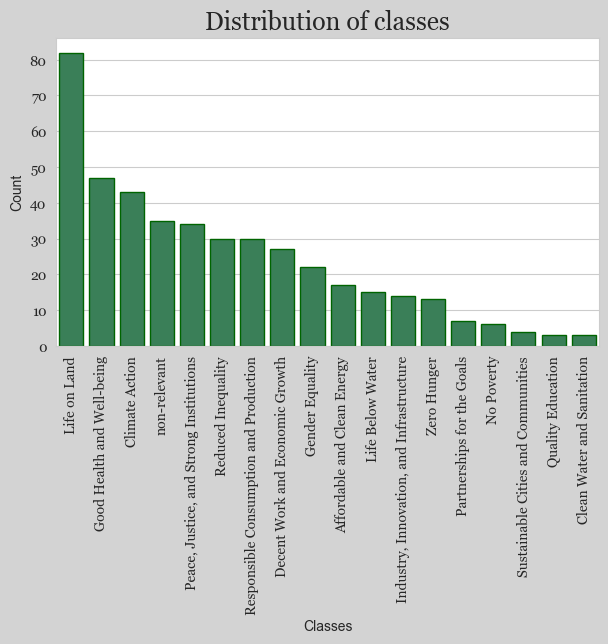

In [148]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
plt.figure(figsize=(7, 4), facecolor='lightgrey')
sns.countplot(data=df, x='Label', order=df.Label.value_counts().index, color='seagreen', edgecolor='darkgreen')

font = "Georgia"
plt.title('Distribution of classes', fontname=font, fontsize=18)
plt.xlabel('Classes')
plt.ylabel('Count')
plt.xticks(rotation=90, fontname=font)
plt.yticks(fontname=font)

plt.show()


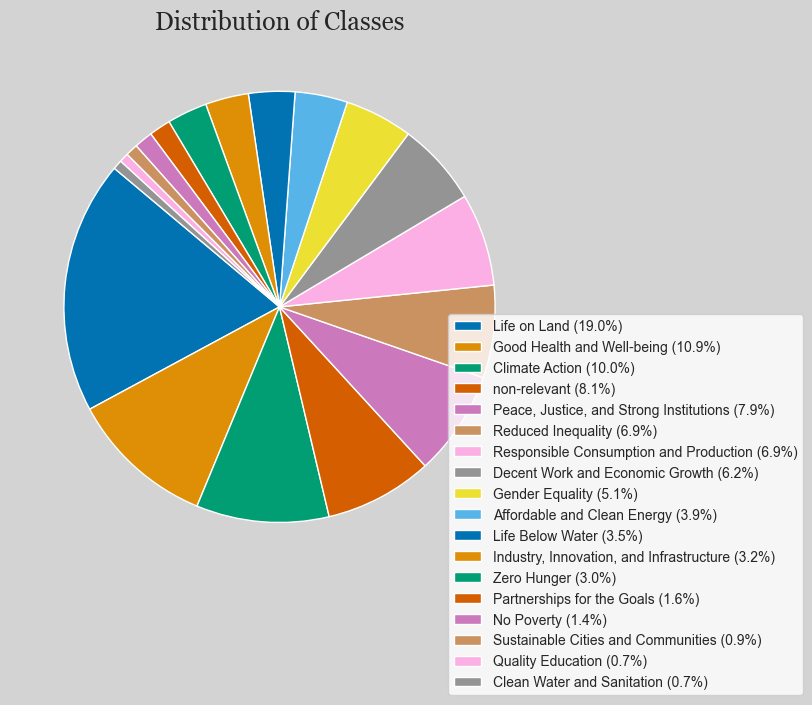

In [93]:

label_counts = df['Label'].value_counts()

# calculate percentages
total = label_counts.sum()
percentages = [f'{(count/total)*100:.1f}%' for count in label_counts]
# set color palette
colors = sns.color_palette('colorblind')

# plot as a pie chart
plt.figure(figsize=(7, 7), facecolor='lightgrey')
patches, _ = plt.pie(label_counts, startangle=140, colors=colors, pctdistance=0.90)
plt.title('Distribution of Classes', fontname=font, fontsize=18)
legend_labels = [f'{label} ({percentage})' for label, percentage in zip(label_counts.index, percentages)]
plt.legend(legend_labels, loc='upper left', bbox_to_anchor=(0.8, 0.5))

plt.show()

### Text Stats

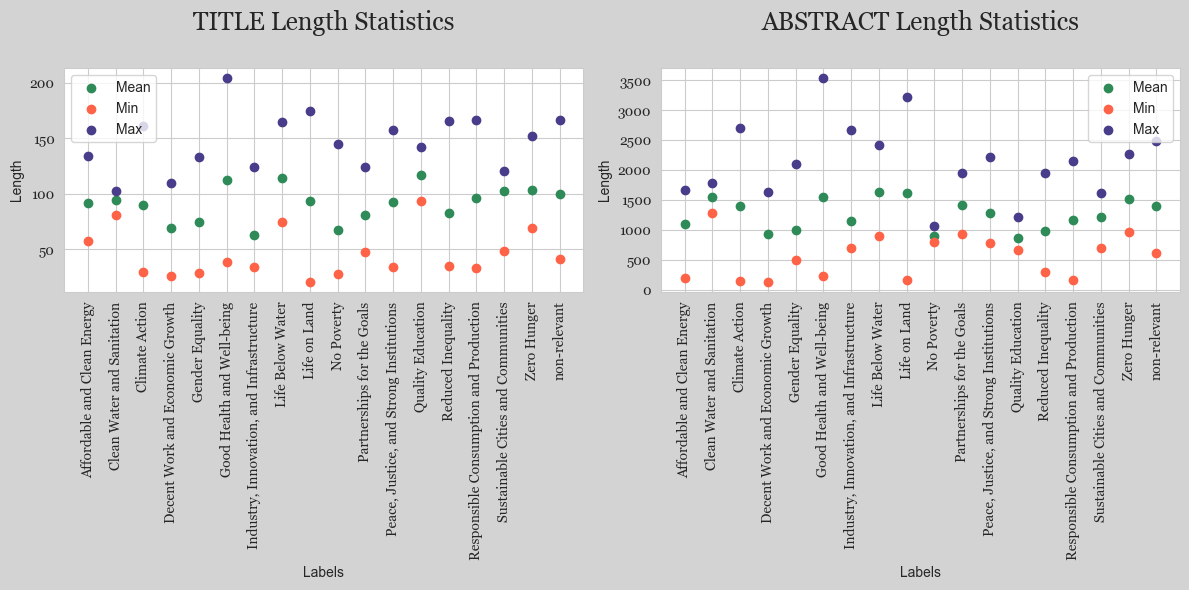

In [149]:
# compute the length of the title and abstract for each class/label

def computeVisualizeStats(df):

    label_statistics = {}
    for label, group in df.groupby('Label'):
        title_lengths = group['TITLE'].apply(len)
        abstract_lengths = group['ABSTRACT'].apply(len)
        label_statistics[label] = {
            'Title': {
                'Mean': title_lengths.mean(),
                'Min': title_lengths.min(),
                'Max': title_lengths.max()
            },
            'Abstract': {
                'Mean': abstract_lengths.mean(),
                'Min': abstract_lengths.min(),
                'Max': abstract_lengths.max()
            }
        }


    #######################################################
    # visualize
    #######################################################

    labels = []
    title_means = []
    title_mins = []
    title_maxs = []
    abstract_means = []
    abstract_mins = []
    abstract_maxs = []

    for label, stats in label_statistics.items():
        labels.append(label)
        title_means.append(stats['Title']['Mean'])
        title_mins.append(stats['Title']['Min'])
        title_maxs.append(stats['Title']['Max'])
        abstract_means.append(stats['Abstract']['Mean'])
        abstract_mins.append(stats['Abstract']['Min'])
        abstract_maxs.append(stats['Abstract']['Max'])

    # Scatter plots for title statistics
    plt.figure(figsize=(12, 6), facecolor='lightgrey')
    plt.subplot(1, 2, 1)
    plt.scatter(labels, title_means, color='seagreen', label='Mean')
    plt.scatter(labels, title_mins, color='tomato', label='Min')
    plt.scatter(labels, title_maxs, color='darkslateblue', label='Max')
    plt.title('TITLE Length Statistics\n', fontname=font, fontsize=18)
    plt.xlabel('Labels')
    plt.ylabel('Length')
    plt.xticks(rotation=90, fontname=font)
    plt.yticks(fontname=font)
    plt.legend()

    # Scatter plots for abstract statistics
    plt.subplot(1, 2, 2)
    plt.scatter(labels, abstract_means, color='seagreen', label='Mean')
    plt.scatter(labels, abstract_mins, color='tomato', label='Min')
    plt.scatter(labels, abstract_maxs, color='darkslateblue', label='Max')
    plt.title('ABSTRACT Length Statistics\n', fontname=font, fontsize=18)
    plt.xlabel('Labels')
    plt.ylabel('Length')
    plt.xticks(rotation=90, fontname=font)
    plt.yticks(fontname=font)
    plt.legend()


    plt.tight_layout()
    plt.show()



computeVisualizeStats(df=df)

----
## Task 2

In [140]:
df_2 = train_data_2
df_2.head()

,ID,TITLE,ABSTRACT,URL,SDG,MAIN_TARGET,SECONDARY_TARGETS,Label
0,oai:www.zora.uzh.ch:134392,Saving more in groups: field experimental evid...,We test the impact of a peer group savings pro...,https://www.zora.uzh.ch/id/eprint/134392,1,1.4,[],No Poverty
1,oai:www.zora.uzh.ch:88401,Negotiating access to land in Nepal,In a rural agrarian economy like that of Nepal...,https://www.zora.uzh.ch/id/eprint/88401,1,1.4,[],No Poverty
2,oai:www.zora.uzh.ch:121514,"Behavioural economics, experimentalism and the...",Using market-based pro-poor development policy...,https://www.zora.uzh.ch/id/eprint/121514,1,1.4,[1.3],No Poverty
3,oai:www.zora.uzh.ch:157456,Long-term Investment Choices for Quinoa Farmer...,The goal of this article is to assess the opti...,https://www.zora.uzh.ch/id/eprint/157456,2,2.3,[2.1],Zero Hunger
4,oai:www.zora.uzh.ch:160626,"Influence of temperature, humidity duration an...",High occurrence of Fusarium poae (FP) and Fusa...,https://www.zora.uzh.ch/id/eprint/160626,2,2.1,[],Zero Hunger


In [141]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 51 non-null     object
 1   TITLE              51 non-null     object
 2   ABSTRACT           51 non-null     object
 3   URL                51 non-null     object
 4   SDG                51 non-null     int64 
 5   MAIN_TARGET        51 non-null     object
 6   SECONDARY_TARGETS  51 non-null     object
 7   Label              51 non-null     object
dtypes: int64(1), object(7)
memory usage: 3.3+ KB


In [142]:
print(f"Total unique labels: {df_2.Label.nunique()}")

Total unique labels: 17


In [153]:
print(f"Total unique MAIN_TARGET: {df_2.MAIN_TARGET.nunique()}")
print(f"Unique MAIN_TARGET: {df_2.MAIN_TARGET.unique()}")
df_2.MAIN_TARGET.value_counts()

Total unique MAIN_TARGET: 25
Unique MAIN_TARGET: ['1.4' '2.3' '2.1' '3.4' '3.3' '4.4' 'No Target Applies' '4.1' '5.4' '5.5'
 '6.1' '6.3' '7.2' '8.5' '10.2' '11.6' '11.3' '12.8' '13.2' '13.3' '14.a'
 '15.5' '16.1' '16.5' '17.10']


MAIN_TARGET
No Target Applies    14
1.4                   3
12.8                  3
7.2                   3
10.2                  2
2.1                   2
3.4                   2
5.4                   2
8.5                   2
13.2                  2
11.6                  2
16.5                  1
16.1                  1
15.5                  1
14.a                  1
13.3                  1
3.3                   1
11.3                  1
4.4                   1
2.3                   1
6.3                   1
6.1                   1
5.5                   1
4.1                   1
17.10                 1
Name: count, dtype: int64

In [155]:
print(f"{df_2.SECONDARY_TARGETS.value_counts()}")

SECONDARY_TARGETS
[]            39
[1.3]          1
[2.1]          1
[3.8]          1
[5.1]          1
[6.3, 6.5]     1
[6.5]          1
[7.1]          1
[8.6]          1
[10.3]         1
[11.2]         1
[11.6]         1
[14.2]         1
Name: count, dtype: int64


In [143]:
df_2.Label.value_counts()

Label
No Poverty                                  3
Reduced Inequality                          3
Peace, Justice, and Strong Institutions     3
Life on Land                                3
Life Below Water                            3
Climate Action                              3
Responsible Consumption and Production      3
Sustainable Cities and Communities          3
Industry, Innovation, and Infrastructure    3
Zero Hunger                                 3
Decent Work and Economic Growth             3
Affordable and Clean Energy                 3
Clean Water and Sanitation                  3
Gender Equality                             3
Quality Education                           3
Good Health and Well-being                  3
Partnerships for the Goals                  3
Name: count, dtype: int64

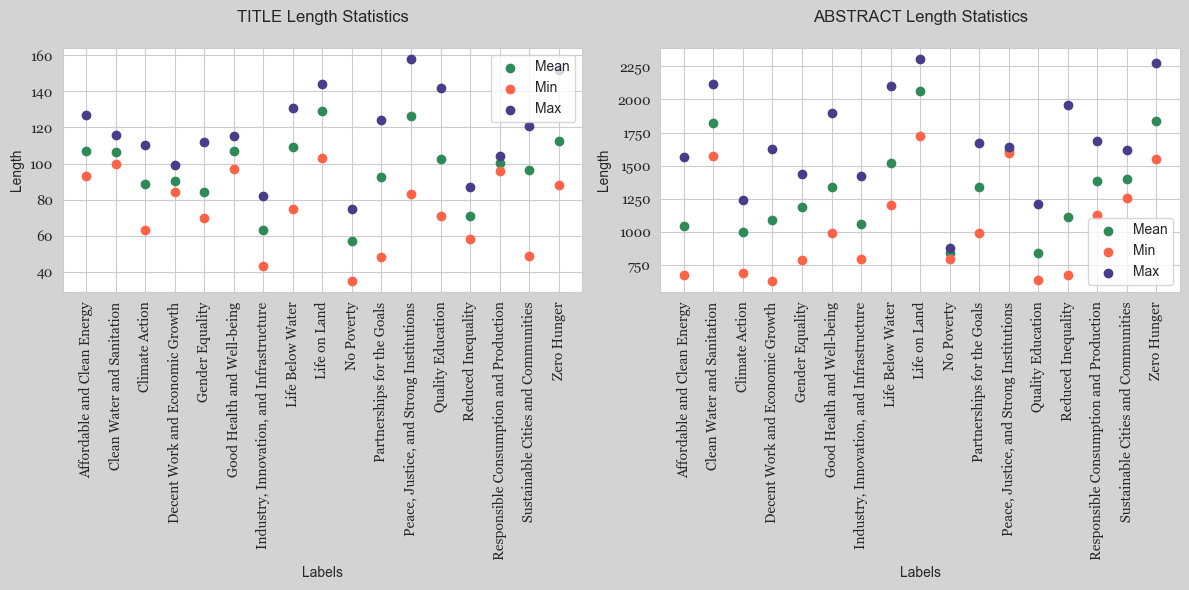

In [144]:
computeVisualizeStats(df=df_2)